In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

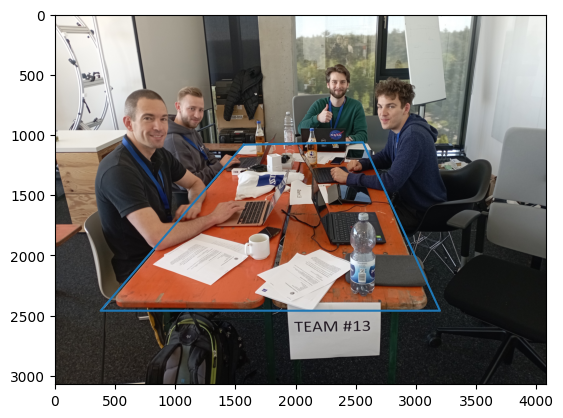

In [70]:
img = cv.imread('../data/IMG_20240427_135247.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
plt.imshow(img)
plt.plot([1570,380,3200,2560,1570],[1080,2460,2460,1060,1080]);

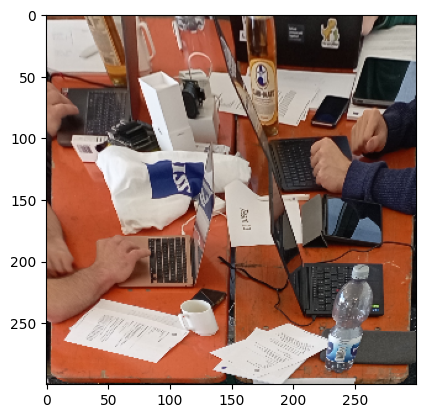

In [74]:
pts1 = np.float32([[1570, 1080],[2560,1060],[380,2460],[3200,2460]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
img_warped = cv.warpPerspective(img,M,(300,300))
plt.imshow(img_warped);